$$ min \ f = \sum_{j=1}^K \sum_{x_{i}\epsilon C_{j}} || x_{j}-\mu_{j}||^2 $$

In [1]:
import csv
import numpy as np
import pandas as pd
class Particle:
    def __init__(self, num_clusters, num_features):
        self.position = np.random.rand(num_clusters, num_features)
        self.velocity = np.random.rand(num_clusters, num_features)
        self.best_position = self.position.copy()
        self.best_fitness = float('inf')

In [2]:
def fitness_function(data, particles, num_clusters):
    distances = np.zeros((len(data), num_clusters))

    for i, particle in enumerate(particles):
        for j in range(num_clusters):
            distances[:, j] = np.linalg.norm(data - particle.position[j], axis=1)

        particle_fitness = np.sum(np.min(distances, axis=1))
        
        if particle_fitness < particle.best_fitness:
            particle.best_fitness = particle_fitness
            particle.best_position = particle.position.copy()

    return particles

In [3]:
def update_velocity_position(particles, inertia, c1, c2, global_best_position):
    for particle in particles:
        inertia_term = inertia * particle.velocity
        cognitive_term = c1 * np.random.rand() * (particle.best_position - particle.position)
        social_term = c2 * np.random.rand() * (global_best_position - particle.position)

        particle.velocity = inertia_term + cognitive_term + social_term
        particle.position = particle.position + particle.velocity

In [4]:
def initialize_particles(num_particles, num_clusters, num_features):
    particles = [Particle(num_clusters, num_features) for _ in range(num_particles)]
    return particles

In [16]:
# Load your data and set parameters
data = np.loadtxt("./data/wikipedia_td.txt")
num_particles = 30
num_clusters = 10
num_features = data.shape[1]
max_iterations = 100
inertia = 0.5
c1 = 2.0
c2 = 2.0


# Initialize particles
particles = initialize_particles(num_particles, num_clusters, num_features)
global_best_position = None
global_best_fitness = float('inf')


(4423, 10)


In [6]:
# PSO Main Loop
for iteration in range(max_iterations):
    particles = fitness_function(data, particles, num_clusters)
    
    # Update global best
    for particle in particles:
        if particle.best_fitness < global_best_fitness:
            global_best_fitness = particle.best_fitness
            global_best_position = particle.best_position.copy()

    # Update particles' velocity and position
    update_velocity_position(particles, inertia, c1, c2, global_best_position)

In [7]:
import csv

# Load dictionary from CSV file
dictionary_path = "./data/dictionary.csv"  # Replace with the actual path to your dictionary CSV file
dictionary = {}

with open(dictionary_path, "r", encoding="utf-8") as csvfile:
    reader = csv.reader(csvfile)
    for index, word in enumerate(reader):
        dictionary[index] = word[0]

# print(dictionary)

# Print the words corresponding to the top 10 entries of the global best position
sorted_indices = np.argsort(-global_best_position, axis=1)
top_words = [[dictionary[idx] for idx in row[:10]] for row in sorted_indices]
print("Top words for each cluster:")
for cluster_index, words in enumerate(top_words):
    print(f"Cluster {cluster_index + 1}: {', '.join(words)}")



Top words for each cluster:
Cluster 1: hour, street, special, perform, decade, walk, force, control, common, deal
Cluster 2: receive, television, request, critic, critical, successful, schedule, guest, sell, achieve
Cluster 3: win, business, annual, rise, manager, guest, leader, moment, shortly, positive
Cluster 4: speak, note, development, appear, mixed, production, defeat, focus, display, fail
Cluster 5: schedule, refuse, academy, idea, explain, test, president, television, prior, promote
Cluster 6: leader, rule, paid, united, half, especially, search, match, range, sound
Cluster 7: train, status, service, receive, producer, rest, rise, host, influence, attack
Cluster 8: star, traditional, feature, attention, largest, hospital, video, base, fight, book
Cluster 9: play, action, victory, draw, feature, house, night, summer, sound, drop
Cluster 10: canada, love, represent, top, arrive, shoot, event, reference, fan, criticize


In [8]:
import csv

# Load dictionary from CSV file
titles_path = "./data/titles.csv"  # Replace with the actual path to your dictionary CSV file
titles = {}

with open(titles_path, "r", encoding="utf-8") as csvfile:
    reader = csv.reader(csvfile)
    for index, title in enumerate(reader):
        titles[index] = title[0]


In [9]:
sorted_indices = np.argsort(-global_best_position, axis=0)
top_titles = [[titles[idx] for idx in row[:10]] for row in sorted_indices]
print("Top 10 titles for each cluster:")
for cluster_index, titles in enumerate(top_titles):
    print(f"Cluster {cluster_index + 1}: {', '.join(titles)}")

Top 10 titles for each cluster:
Cluster 1: Beyonce, Keanu_Reeves, Lisa_Brennan-Jobs, Beyonce, Coachella_Valley_Music_and_Arts_Festival, Charlie_Sheen, Charlie_Sheen, Charlie_Sheen, Lisa_Brennan-Jobs, Beyonce
Cluster 2: Lisa_Brennan-Jobs, Negan, Charlie_Sheen, Unfinished_portrait_of_Franklin_D._Roosevelt, Beyonce, Crimson_Peak, Crimson_Peak, Keanu_Reeves, Charlie_Sheen, Rodrigo_Duterte
Cluster 3: Rodrigo_Duterte, Beyonce, Rodrigo_Duterte, Charlie_Sheen, Negan, Lisa_Brennan-Jobs, Keanu_Reeves, Lisa_Brennan-Jobs, Cam_Newton, Keanu_Reeves
Cluster 4: Unfinished_portrait_of_Franklin_D._Roosevelt, Cam_Newton, Unfinished_portrait_of_Franklin_D._Roosevelt, Negan, Charlie_Sheen, Cam_Newton, Coachella_Valley_Music_and_Arts_Festival, Negan, Unfinished_portrait_of_Franklin_D._Roosevelt, Negan
Cluster 5: Charlie_Sheen, Coachella_Valley_Music_and_Arts_Festival, Cam_Newton, Lisa_Brennan-Jobs, Rodrigo_Duterte, Coachella_Valley_Music_and_Arts_Festival, Rodrigo_Duterte, Coachella_Valley_Music_and_Arts_Fe

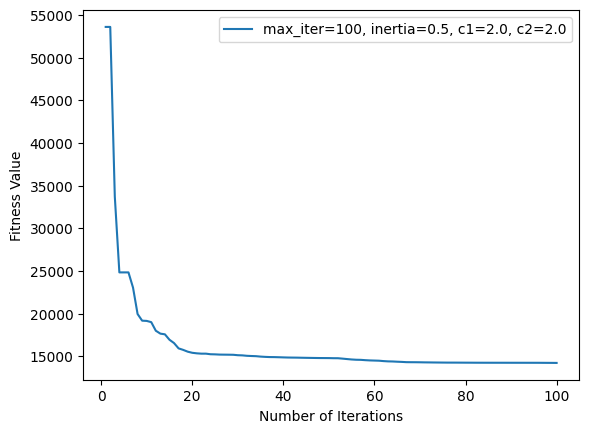


Best Results:
0               max_iterations  inertia   c1   c2  best_fitness
max_iterations                                                 
100                      100.0      0.5  2.0  2.0  14231.294182


In [17]:
import matplotlib.pyplot as plt
# Experiment with different maximum iteration values (100, 500, 1000)
max_iterations_values = [100]

# Experiment with different parameter values
inertia_values = [0.5]
c1_values = [2.0]
c2_values = [2.0]

# Collect results for plotting
results = []

for max_iterations in max_iterations_values:
    for inertia in inertia_values:
        for c1 in c1_values:
            for c2 in c2_values:
                # Initialize particles
                particles = initialize_particles(num_particles, num_clusters, num_features)
                global_best_position = None
                global_best_fitness = float('inf')
                fitness_history = []

                # PSO Main Loop
                for iteration in range(max_iterations):
                    particles = fitness_function(data, particles, num_clusters)

                    # Update global best
                    for particle in particles:
                        if particle.best_fitness < global_best_fitness:
                            global_best_fitness = particle.best_fitness
                            global_best_position = particle.best_position.copy()

                    fitness_history.append(global_best_fitness)

                    # Update particles' velocity and position
                    update_velocity_position(particles, inertia, c1, c2, global_best_position)

                # Store the results for this combination of parameters
                results.append({
                    'max_iterations': max_iterations,
                    'inertia': inertia,
                    'c1': c1,
                    'c2': c2,
                    'best_fitness': global_best_fitness
                })
                # Plot fitness vs number of iterations
                plt.plot(range(1, max_iterations + 1), fitness_history, label=f"max_iter={max_iterations}, inertia={inertia}, c1={c1}, c2={c2}")

plt.xlabel('Number of Iterations')
plt.ylabel('Fitness Value')
plt.legend()
plt.show()

# Find the best result for each algorithm
best_results_df = pd.DataFrame(results)
best_results = best_results_df.groupby('max_iterations').apply(lambda x: x.loc[x['best_fitness'].idxmin()])

print("\nBest Results:")
print(best_results[['max_iterations', 'inertia', 'c1', 'c2', 'best_fitness']])


In [48]:
# Load titles from CSV file
titles_path = "./data/titles.csv"  # Replace with the actual path to your titles CSV file
titles_df = pd.read_csv(titles_path, header=None, names=['Titles'])

# Find the top 10 titles for each cluster
top_titles_indices = np.argsort(-global_best_position, axis=0)
top_titles = titles_df.iloc[top_titles_indices.flatten()]['Titles'].values.reshape(10, -1)

print(top_titles_indices.shape)
# Print the top 10 titles for each cluster
# print("\nTop titles for each cluster:")
# for cluster_index, cluster_titles in enumerate(top_titles):
#     print(f"Cluster {cluster_index + 1}:")
#     for title in cluster_titles:
#         print(f"  - {title}")

(10, 500)


## GREY WOLF OPTIMIZATION(GWO)

In [10]:
import numpy as np
import pandas as pd

class GreyWolf:
    def __init__(self, num_clusters, num_features):
        self.position = np.random.rand(num_clusters, num_features)
        self.best_position = self.position.copy()
        self.best_fitness = float('inf')

In [11]:
def gwo_fitness_function(data, wolves, num_clusters):
    distances = np.zeros((len(data), num_clusters))

    for i, wolf in enumerate(wolves):
        for j in range(num_clusters):
            distances[:, j] = np.linalg.norm(data - wolf.position[j], axis=1)

        wolf_fitness = np.sum(np.min(distances, axis=1))

        if wolf_fitness < wolf.best_fitness:
            wolf.best_fitness = wolf_fitness
            wolf.best_position = wolf.position.copy()

    return wolves

In [12]:
def gwo_update_position(wolves, a, num_clusters):
    alpha, beta, delta = wolves[0], wolves[1], wolves[2]

    for wolf in wolves:
        r1, r2 = np.random.rand(), np.random.rand()
        A1, A2, A3 = 2 * a * r1 - a, 2 * a * r2 - a, 2 * r2

        D_alpha = np.abs(A1 * alpha.position - wolf.position)
        D_beta = np.abs(A2 * beta.position - wolf.position)
        D_delta = np.abs(A3 * delta.position - wolf.position)

        X1 = alpha.position - A1 * D_alpha
        X2 = beta.position - A2 * D_beta
        X3 = delta.position - A3 * D_delta

        wolf.position = (X1 + X2 + X3) / 3

In [13]:
def gwo_initialize_wolves(num_wolves, num_clusters, num_features):
    wolves = [GreyWolf(num_clusters, num_features) for _ in range(num_wolves)]
    return wolves

In [14]:
# Load your data and set parameters
data = np.loadtxt("./data/wikipedia_td.txt")
num_wolves = 3  # Number of wolves in the GWO algorithm
num_clusters = 10
num_features = data.shape[1]
max_iterations = 100
a = 2.0  # Parameter for GWO algorithm

# Initialize wolves
wolves = gwo_initialize_wolves(num_wolves, num_clusters, num_features)

In [15]:
# GWO Main Loop
for iteration in range(max_iterations):
    wolves = gwo_fitness_function(data, wolves, num_clusters)

    # Update wolves' positions
    gwo_update_position(wolves, a, num_clusters)

In [21]:
# Retrieve the best wolf's position
global_best_position = wolves[np.argmin([wolf.best_fitness for wolf in wolves])].best_position


# Load dictionary from CSV file
dictionary_path = "./data/dictionary.csv"  # Replace with the actual path to your dictionary CSV file
dictionary = {}

with open(dictionary_path, "r", encoding="utf-8") as csvfile:
    reader = csv.reader(csvfile)
    for index, word in enumerate(reader):
        dictionary[index] = word[0]


(10, 500)


In [22]:
# Print the words corresponding to the top 10 entries of the global best position
sorted_indices = np.argsort(-global_best_position, axis=1)
top_words = [[dictionary[idx] for idx in row[:10]] for row in sorted_indices]
print("Top words for each cluster (GWO):")
for cluster_index, words in enumerate(top_words):
    print(f"Cluster {cluster_index + 1}: {', '.join(words)}")


[[171 318 208 ... 453  24 149]
 [287 335 182 ... 381  74 348]
 [353 435 425 ... 205 225  83]
 ...
 [367 207 274 ... 203 292 484]
 [360 289 403 ...   0 278  68]
 [454 312  20 ... 110 477  18]]
Top words for each cluster (GWO):
Cluster 1: writing, annual, personal, version, argue, system, sometimes, local, website, cause
Cluster 2: fellow, radio, seek, university, request, track, article, travel, conclude, cross
Cluster 3: private, church, reviews, local, president, spend, decline, achieve, white, fail
Cluster 4: significant, addition, minute, series, reference, debut, develop, website, plan, effect
Cluster 5: accord, suffer, miss, executive, book, decline, commercial, website, debut, rest
Cluster 6: san, suggest, central, bill, offer, game, total, canada, manager, reach
Cluster 7: lead, occur, set, boy, war, private, mixed, ability, wear, sense
Cluster 8: pick, promote, style, attention, history, king, activity, publish, produce, originally
Cluster 9: mention, meeting, guest, participat

In [18]:
# Load titles from CSV file
titles_path = "./data/titles.csv"  # Replace with the actual path to your titles CSV file
titles_df = pd.read_csv(titles_path, header=None, names=['Titles'])

In [27]:
import csv

# Load dictionary from CSV file
titles_path = "./data/titles.csv"  # Replace with the actual path to your dictionary CSV file
titles = {}

with open(titles_path, "r", encoding="utf-8") as csvfile:
    reader = csv.reader(csvfile)
    for index, title in enumerate(reader):
        titles[index] = title[0]

sorted_indices = np.argsort(-global_best_position, axis=0)
top_titles = [[titles[idx] for idx in row[:10]] for row in sorted_indices]
print("Top 10 titles for each cluster:")
for cluster_index, cluster_titles in enumerate(top_titles):
    print(f"Cluster {cluster_index + 1}: {', '.join(cluster_titles)}")


Top 10 titles for each cluster:
Cluster 1: Keanu_Reeves, Negan, Crimson_Peak, Unfinished_portrait_of_Franklin_D._Roosevelt, Charlie_Sheen, Rodrigo_Duterte, Coachella_Valley_Music_and_Arts_Festival, Keanu_Reeves, Keanu_Reeves, Cam_Newton
Cluster 2: Rodrigo_Duterte, Coachella_Valley_Music_and_Arts_Festival, Keanu_Reeves, Coachella_Valley_Music_and_Arts_Festival, Keanu_Reeves, Cam_Newton, Cam_Newton, Unfinished_portrait_of_Franklin_D._Roosevelt, Negan, Crimson_Peak
Cluster 3: Unfinished_portrait_of_Franklin_D._Roosevelt, Cam_Newton, Cam_Newton, Negan, Lisa_Brennan-Jobs, Crimson_Peak, Unfinished_portrait_of_Franklin_D._Roosevelt, Rodrigo_Duterte, Lisa_Brennan-Jobs, Beyonce
Cluster 4: Coachella_Valley_Music_and_Arts_Festival, Keanu_Reeves, Unfinished_portrait_of_Franklin_D._Roosevelt, Crimson_Peak, Cam_Newton, Beyonce, Crimson_Peak, Crimson_Peak, Cam_Newton, Keanu_Reeves
Cluster 5: Cam_Newton, Charlie_Sheen, Negan, Charlie_Sheen, Negan, Coachella_Valley_Music_and_Arts_Festival, Charlie_Shee